### Sentiment Analysis

In [62]:
# Import Libraries

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download("vader_lexicon")
nltk.download('punkt')
import numpy as np
import pandas as pd
import statistics

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aad.sray\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aad.sray\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
# Import data and pre- process data

df = pd.read_csv('db2023_cleandf.csv')
df['ID'] = range(1, 480)

df.drop(columns=['Time'], inplace=True)

df.head()


,Comment,Score,ID
0,Posting a bit early so people know where to go...,1,1
1,20% fare reduction on public transport continu...,39,2
2,This is good.,3,3
3,"Aaaaaahhhhh, what have the Greens done for us!",2,4
4,"€67 million to provide 16,000 craft apprentice...",25,5


In [64]:
type(df)

pandas.core.frame.DataFrame

In [65]:
np.nan

nan

In [ ]:
# Define a function for compound score 

In [66]:
def compound_score(text):
    scores = [sia.polarity_scores(sentence)["compound"]  for sentence in nltk.sent_tokenize(text)]
    if (len(scores) >= 1):
        return statistics.mean(scores)
    else:
        return np.nan

In [67]:
# Print first comment to test

print(df["Comment"][0])

Posting a bit early so people know where to go when it starts. Feel free to chat in here since there are certain bits coming out on X already.


In [68]:
# Calculate a compound score for first comment in df

compound_score(df["Comment"][0])

0.32985

In [69]:
df["Compound Score"] = [compound_score(text) for text in df["Comment"]]

In [70]:
df.sort_values("Compound Score", ascending=False)

,Comment,Score,ID,Compound Score
416,Minor issue but would be great if they extend ...,-1,417,0.9136
92,I haven't read the budget but this looks inter...,2,93,0.9136
283,Im more curious about why CB is always a doubl...,3,284,0.8856
207,I think FF and FG would be easily recognisable...,21,208,0.8730
367,> Did I read that right in that landlords are ...,11,368,0.8683
...,...,...,...,...
67,"Poor people will keep being poor regardless, p...",-6,68,-0.7351
226,Pearse making some decent points but he's awfu...,10,227,-0.7876
79,This is such a fucking stupid argument. This p...,-10,80,-0.7953
384,Lol the banks caused the financial crisis and ...,3,385,-0.8442


In [71]:
for row in df.sort_values("Compound Score", ascending=False).iloc[:15,0]:
    print(row)
    print("*******************")

Minor issue but would be great if they extend child benefit for those over 18 still in school.
*******************
I haven't read the budget but this looks interesting, with corporate tax increasing the r&d credit might force companies create value and not just trying to move money.
*******************
Im more curious about why CB is always a double payment at Christmas, Surely doing it around June or July to help with back to school expenses would be more beneficial for them ?
*******************
I think FF and FG would be easily recognisable by giving landlords double the benefits of everyone else
*******************
> Did I read that right in that landlords are getting €3000

The first €3000 of their income at the standard rate to be tax free, so the benefit is worth somewhere around €600-750 (not sure if PRSI/USC are relevant) next year.
*******************
Energy credits are great we've only used up last year's and got our first electric bill this year.
*******************
I can't

In [72]:
for row in df.sort_values("Compound Score", ascending=True).iloc[:15,0]:
    print(row)
    print("*******************")

Managing the economy has never really been this governments problem, they have done a great job managing it since 2016 but the problems people have is their seeming animosity towards anyone aged 16-40 and overall lack of forward thinking.
*******************
Lol the banks caused the financial crisis and why we had to pay USC to bail them out fucking tax them you dumb fucks.
*******************
This is such a fucking stupid argument. This place moans about big multi-nationals taking over small buisnesses and screams and cries when there's a whisper of a Wetherspoons opening yet at the same time find absolutely no problem that small independent buisnesses are having to deal with increased costs on literally everything with income staying flat or declining.
*******************
Pearse making some decent points but he's awful boring to listen to.
*******************
Poor people will keep being poor regardless, prices will rise as a result of this
*******************
If they said anything ab

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

### Creating new column with compound scores so we can do some test/train validations 

In [74]:
# Add a new column "Compound Score" to the DataFrame
df["Compound Score"] = df["Comment"].apply(compound_score)

In [75]:
df.head()

,Comment,Score,ID,Compound Score
0,Posting a bit early so people know where to go...,1,1,0.32985
1,20% fare reduction on public transport continu...,39,2,0.00000
2,This is good.,3,3,0.44040
3,"Aaaaaahhhhh, what have the Greens done for us!",2,4,0.00000
4,"€67 million to provide 16,000 craft apprentice...",25,5,0.00000


In [76]:
df.tail()

,Comment,Score,ID,Compound Score
474,[deleted],-1,475,0.0000
475,You did not,3,476,0.0000
476,Whats the 18 year old minimum wage rate going to?,1,477,0.0000
477,10.16 I'd say,1,478,0.0000
478,Yeah forgot its a set rate of 80% of minimum w...,1,479,0.3682


In [77]:
# Assuming df["Compound Score"] contains your compound scores
threshold = 0.0

# Create a new column "Sentiment" based on the threshold
df["Sentiment"] = df["Compound Score"].apply(lambda score: 'positive' if score > threshold else ('negative' if score < threshold else 'neutral'))


In [78]:
# Print the number of entries for each sentiment category
sentiment_counts = df["Sentiment"].value_counts()

# Display the counts
print(sentiment_counts)


Sentiment
positive    229
neutral     150
negative    100
Name: count, dtype: int64


In [80]:
# Calculate the number of very positive comments

# Re-assign threshold for v.pos reviews
threshold = 0.5

# Create a boolean Series indicating v.pos
very_pos_mask = df["Compound Score"] > threshold

# Filter DataFrame
very_pos_reviews = df[very_pos_mask]

# Print Comment and Compound Score columns

print(very_pos_reviews[["Comment", "Compound Score", "Score"]])


                                               Comment  Compound Score  Score
25   Free School Book Scheme for junior cycle stude...        0.624900     23
26   Fucking delighted, young lad going in to 1st y...        0.777800     16
27   Mortgage interest relief for those on trackers...        0.600450     76
31   "Relief will be available in respect of the in...        0.612267      6
39   I can't wait to see landlords being satisfied ...        0.780200      5
40                    Energy credits \n\n3 × 150e each        0.557400     11
51   Congratulations, you're just a regular old adu...        0.599400     10
55       They should make the country more fun somehow        0.556300     34
64   It’s actually worth more than €8/hr was back i...        0.508450      3
83   Yes a difference as in structuring and support...        0.596600      0
92   I haven't read the budget but this looks inter...        0.913600      2
118  I got my tax relief credit in Feb  of 500 can ...        0.

In [81]:
def pos_score(text):
    # Calculate positive scores for each sentence
    scores = [sia.polarity_scores(sentence)["pos"] for sentence in nltk.sent_tokenize(text)]
    
    # Check there are scores
    if len(scores) >= 1:
        return statistics.mean(scores)
    else:
        return np.nan


In [82]:
def neg_score(text):
    # Calculate negative scores for each sentence
    scores = [sia.polarity_scores(sentence)["neg"] for sentence in nltk.sent_tokenize(text)]
    
    # Check there are scores
    if len(scores) >= 1:
        return statistics.mean(scores)
    else:
        return np.nan

In [83]:
def neu_score(text):
    # Calculate neutral scores 
    scores = [sia.polarity_scores(sentence)["neu"] for sentence in nltk.sent_tokenize(text)]
    
    # Check there are scores
    if len(scores) >= 1:
        return statistics.mean(scores)
    else:
        return np.nan

In [84]:
# For positive comments
X_pos = [
    [
        compound_score(text) + 1,
        pos_score(text) + 1,
        neg_score(text) + 1,
        neu_score(text) + 1
    ]
    for text in df["Comment"]  
]

y_pos = ['pos'] * len(X_pos)

# For negative comments
X_neg = [
    [
        compound_score(text) + 1,
        pos_score(text) + 1,
        neg_score(text) + 1,
        neu_score(text) + 1
    ]
    for text in df["Comment"] 
]

y_neg = ['neg'] * len(X_neg)

# Combine X and y for positive and negative comments
X = X_pos + X_neg
y = y_pos + y_neg


In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Initialize the Multinomial Naive Bayes model
mnb = MultinomialNB()

# Fit the model on the training data
mnb.fit(np.array(X_train), y_train)

# Make predictions on the test data
y_pred = mnb.predict(np.array(X_test))

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         neg       0.48      1.00      0.65       138
         pos       0.00      0.00      0.00       150

    accuracy                           0.48       288
   macro avg       0.24      0.50      0.32       288
weighted avg       0.23      0.48      0.31       288



C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


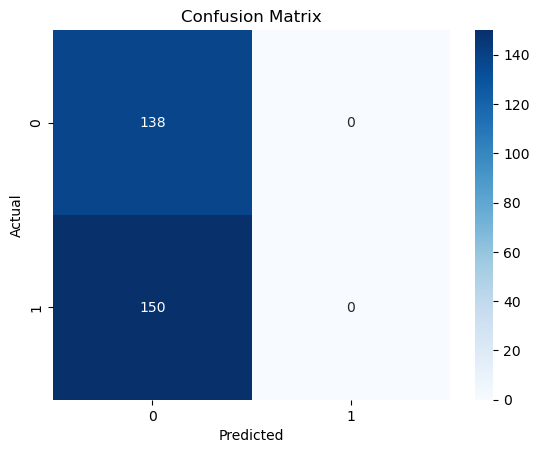

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=['neg', 'pos'])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Visualisations of our Compound Score vs Reddit Scores 

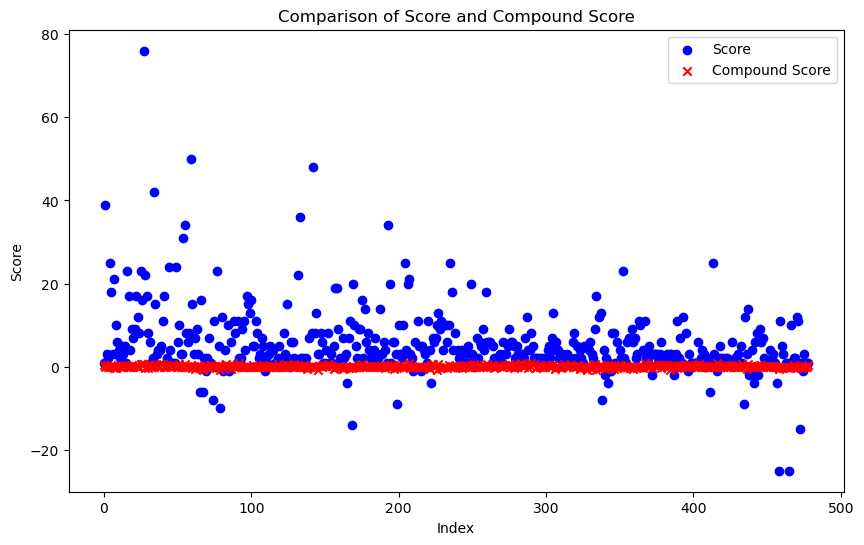

In [87]:
plt.figure(figsize=(10, 6))


plt.scatter(df.index, df["Score"], label="Score", marker='o', color='blue')


plt.scatter(df.index, df["Compound Score"], label="Compound Score", marker='x', color='red')


plt.xlabel("Index")
plt.ylabel("Score")
plt.title("Comparison of Score and Compound Score")
plt.legend()


plt.show()


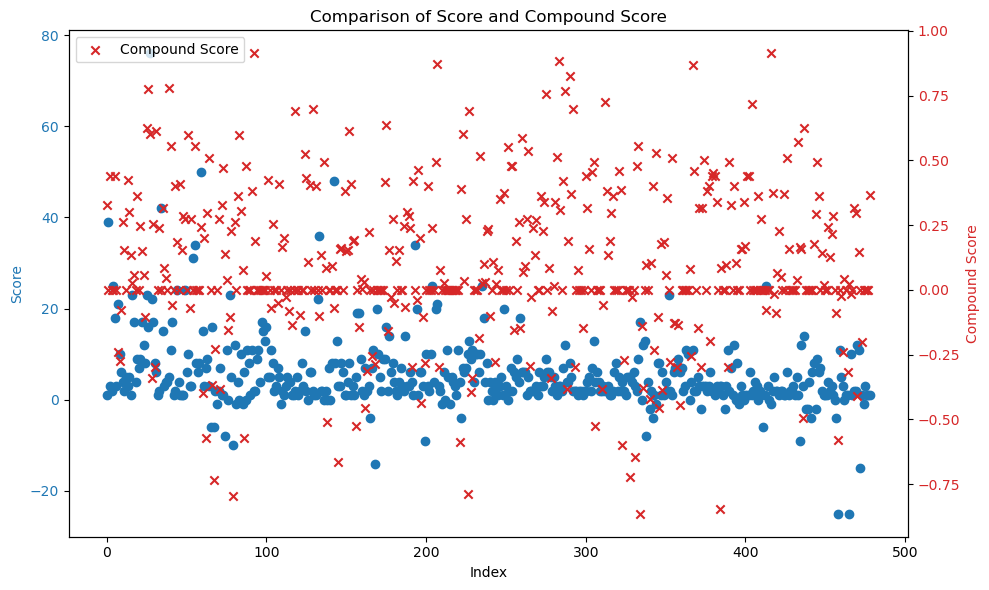

In [88]:
fig, ax1 = plt.subplots(figsize=(10, 6))


color = 'tab:blue'
ax1.set_xlabel('Index')
ax1.set_ylabel('Score', color=color)
ax1.scatter(df.index, df['Score'], label='Score', color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Compound Score', color=color)
ax2.scatter(df.index, df['Compound Score'], label='Compound Score', color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Comparison of Score and Compound Score')
fig.tight_layout()
plt.legend()


plt.show()


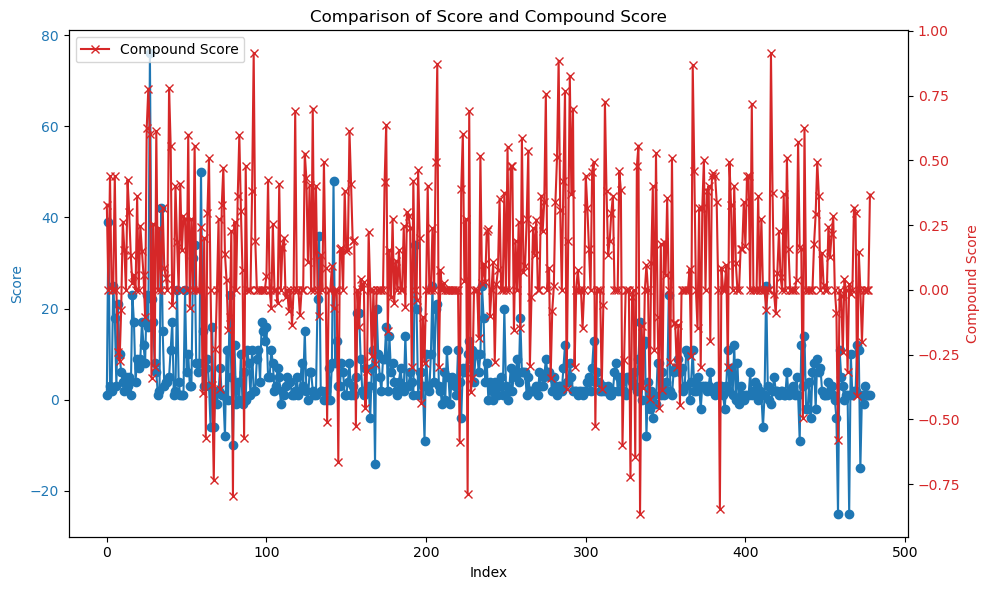

In [89]:
fig, ax1 = plt.subplots(figsize=(10, 6))


color = 'tab:blue'
ax1.set_xlabel('Index')
ax1.set_ylabel('Score', color=color)
ax1.plot(df.index, df['Score'], label='Score', color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Compound Score', color=color)
ax2.plot(df.index, df['Compound Score'], label='Compound Score', color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Comparison of Score and Compound Score')
fig.tight_layout()
plt.legend()


plt.show()
